In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
business= pd.read_csv('business.csv')
economy=pd.read_csv('economy.csv')

In [3]:
business.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price'],
      dtype='object')

In [4]:
business['class']='business'
economy['class']='economy'

In [5]:
total_data=pd.concat([business,economy],axis=0)

In [6]:
total_data.tail(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
206769,31-03-2022,Vistara,UK,832,7:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697",economy
206770,31-03-2022,Vistara,UK,832,7:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709",economy
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,9:05,Hyderabad,"8,640",economy
206772,31-03-2022,Vistara,UK,822,9:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,9:05,Hyderabad,"8,640",economy
206773,31-03-2022,Vistara,UK,824,20:30,Chennai,24h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"8,640",economy


In [7]:
total_data.dropna(inplace = True)


In [8]:
total_data.isnull().sum()


date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
class         0
dtype: int64

In [9]:
# Only taking first string from stop column 

total_data['stop'] = total_data['stop'].str.split().str[0]
total_data['stop'].value_counts()


stop
1-stop      250929
non-stop     36044
2+-stop      13288
Name: count, dtype: int64

In [10]:
#replacing the values 
total_data['stop']=total_data['stop'].replace('non-stop',0)
total_data['stop']=total_data['stop'].replace('1-stop',1)
total_data['stop']=total_data['stop'].replace('2+-stop',2)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16296\2332081882.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  total_data['stop']=total_data['stop'].replace('2+-stop',2)


In [11]:
print(total_data['stop'].dtypes)

int64


In [12]:
total_data['stop'].value_counts()

stop
1    250929
0     36044
2     13288
Name: count, dtype: int64

In [13]:
total_data

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11/2/2022,Air India,AI,868,18:00,Delhi,02h 00m,0,20:00,Mumbai,"25,612",business
1,11/2/2022,Air India,AI,624,19:00,Delhi,02h 15m,0,21:15,Mumbai,"25,612",business
2,11/2/2022,Air India,AI,531,20:00,Delhi,24h 45m,1,20:45,Mumbai,"42,220",business
3,11/2/2022,Air India,AI,839,21:25,Delhi,26h 30m,1,23:55,Mumbai,"44,450",business
4,11/2/2022,Air India,AI,544,17:15,Delhi,06h 40m,1,23:55,Mumbai,"46,690",business
...,...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,832,7:05,Chennai,13h 50m,1,20:55,Hyderabad,"7,697",economy
206770,31-03-2022,Vistara,UK,832,7:05,Chennai,13h 50m,1,20:55,Hyderabad,"7,709",economy
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1,9:05,Hyderabad,"8,640",economy
206772,31-03-2022,Vistara,UK,822,9:45,Chennai,23h 20m,1,9:05,Hyderabad,"8,640",economy


In [14]:
total_data['flight_name']=total_data['ch_code']+'-' +total_data['num_code'].astype(str)

In [15]:
total_data=total_data.drop(columns=['ch_code','num_code'])

In [16]:
total_data['dep_hr']=pd.to_datetime(total_data['dep_time']).dt.hour
total_data['dep_min']=pd.to_datetime(total_data['dep_time']).dt.minute

C:\Users\Dell\AppData\Local\Temp\ipykernel_16296\75514981.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  total_data['dep_hr']=pd.to_datetime(total_data['dep_time']).dt.hour
C:\Users\Dell\AppData\Local\Temp\ipykernel_16296\75514981.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  total_data['dep_min']=pd.to_datetime(total_data['dep_time']).dt.minute


In [17]:
total_data= total_data.drop(columns=['dep_time','arr_time'])


In [18]:
total_data['date']

0          11/2/2022
1          11/2/2022
2          11/2/2022
3          11/2/2022
4          11/2/2022
             ...    
206769    31-03-2022
206770    31-03-2022
206771    31-03-2022
206772    31-03-2022
206773    31-03-2022
Name: date, Length: 300261, dtype: object

In [19]:
#function to parse date format

def parse_date(date):
    try:
        return pd.to_datetime(date,format="%d-%m-%Y")
    except ValueError:
        return pd.to_datetime(date,format="%m/%d/%Y")
        
total_data['date'] = total_data['date'].apply(parse_date)
total_data['date'] = total_data['date'].dt.strftime("%m/%d/%Y")



In [20]:
total_data['flight_day']=pd.to_datetime(total_data['date'],format="%m/%d/%Y").dt.day
total_data['flight_month']=pd.to_datetime(total_data['date'],format="%m/%d/%Y").dt.month

In [21]:
total_data

,date,airline,from,time_taken,stop,to,price,class,flight_name,dep_hr,dep_min,flight_day,flight_month
0,11/02/2022,Air India,Delhi,02h 00m,0,Mumbai,"25,612",business,AI-868,18,0,2,11
1,11/02/2022,Air India,Delhi,02h 15m,0,Mumbai,"25,612",business,AI-624,19,0,2,11
2,11/02/2022,Air India,Delhi,24h 45m,1,Mumbai,"42,220",business,AI-531,20,0,2,11
3,11/02/2022,Air India,Delhi,26h 30m,1,Mumbai,"44,450",business,AI-839,21,25,2,11
4,11/02/2022,Air India,Delhi,06h 40m,1,Mumbai,"46,690",business,AI-544,17,15,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206769,03/31/2022,Vistara,Chennai,13h 50m,1,Hyderabad,"7,697",economy,UK-832,7,5,31,3
206770,03/31/2022,Vistara,Chennai,13h 50m,1,Hyderabad,"7,709",economy,UK-832,7,5,31,3
206771,03/31/2022,Vistara,Chennai,20h 35m,1,Hyderabad,"8,640",economy,UK-826,12,30,31,3
206772,03/31/2022,Vistara,Chennai,23h 20m,1,Hyderabad,"8,640",economy,UK-822,9,45,31,3


In [22]:
total_data.drop(columns=['date'],inplace=True)

In [23]:
total_data

,airline,from,time_taken,stop,to,price,class,flight_name,dep_hr,dep_min,flight_day,flight_month
0,Air India,Delhi,02h 00m,0,Mumbai,"25,612",business,AI-868,18,0,2,11
1,Air India,Delhi,02h 15m,0,Mumbai,"25,612",business,AI-624,19,0,2,11
2,Air India,Delhi,24h 45m,1,Mumbai,"42,220",business,AI-531,20,0,2,11
3,Air India,Delhi,26h 30m,1,Mumbai,"44,450",business,AI-839,21,25,2,11
4,Air India,Delhi,06h 40m,1,Mumbai,"46,690",business,AI-544,17,15,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...
206769,Vistara,Chennai,13h 50m,1,Hyderabad,"7,697",economy,UK-832,7,5,31,3
206770,Vistara,Chennai,13h 50m,1,Hyderabad,"7,709",economy,UK-832,7,5,31,3
206771,Vistara,Chennai,20h 35m,1,Hyderabad,"8,640",economy,UK-826,12,30,31,3
206772,Vistara,Chennai,23h 20m,1,Hyderabad,"8,640",economy,UK-822,9,45,31,3


In [24]:
# Assigning and converting Duration column into list
duration = list(total_data["time_taken"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(duration[i].split(sep = "h")[0])   # Extract hours from duration
    duration_mins.append(duration[i].split(sep = "m")[0].split()[-1])   # Extracts only minutes from duration

In [25]:
total_data["Duration_hours"] = duration_hours
total_data["Duration_mins"] = duration_mins

In [1]:
total_data

NameError: name 'total_data' is not defined

In [27]:
final_data=total_data.rename(columns={'airline':'Airline',
                           'from': 'Source',
                           'to':'Destination',
                           'class':'Class',
                           'stop':'Stop',
                           'price':'Price',
                          'dep_hr':'Dep_hr',
                          'dep_min':'Dep_min',
                          'flight_month':'Flight_month',
                          'flight_day':'Flight_day',
                          })


In [28]:
final_data.columns

Index(['Airline', 'Source', 'time_taken', 'Stop', 'Destination', 'Price',
       'Class', 'flight_name', 'Dep_hr', 'Dep_min', 'Flight_day',
       'Flight_month', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [29]:
final_data=final_data[['Airline', 'Source', 'Stop', 'Destination','Class', 'Dep_hr',
       'Dep_min', 'Flight_day', 'Flight_month', 'Duration_hours',
       'Duration_mins','Price']]

In [30]:
final_data

,Airline,Source,Stop,Destination,Class,Dep_hr,Dep_min,Flight_day,Flight_month,Duration_hours,Duration_mins,Price
0,Air India,Delhi,0,Mumbai,business,18,0,2,11,02,00,"25,612"
1,Air India,Delhi,0,Mumbai,business,19,0,2,11,02,15,"25,612"
2,Air India,Delhi,1,Mumbai,business,20,0,2,11,24,45,"42,220"
3,Air India,Delhi,1,Mumbai,business,21,25,2,11,26,30,"44,450"
4,Air India,Delhi,1,Mumbai,business,17,15,2,11,06,40,"46,690"
...,...,...,...,...,...,...,...,...,...,...,...,...
206769,Vistara,Chennai,1,Hyderabad,economy,7,5,31,3,13,50,"7,697"
206770,Vistara,Chennai,1,Hyderabad,economy,7,5,31,3,13,50,"7,709"
206771,Vistara,Chennai,1,Hyderabad,economy,12,30,31,3,20,35,"8,640"
206772,Vistara,Chennai,1,Hyderabad,economy,9,45,31,3,23,20,"8,640"


In [31]:
 final_data['Class']=final_data['Class'].replace('business',0)
 final_data['Class']=final_data['Class'].replace('economy',1)


C:\Users\Dell\AppData\Local\Temp\ipykernel_16296\361338136.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_data['Class']=final_data['Class'].replace('economy',1)


In [32]:
final_data

,Airline,Source,Stop,Destination,Class,Dep_hr,Dep_min,Flight_day,Flight_month,Duration_hours,Duration_mins,Price
0,Air India,Delhi,0,Mumbai,0,18,0,2,11,02,00,"25,612"
1,Air India,Delhi,0,Mumbai,0,19,0,2,11,02,15,"25,612"
2,Air India,Delhi,1,Mumbai,0,20,0,2,11,24,45,"42,220"
3,Air India,Delhi,1,Mumbai,0,21,25,2,11,26,30,"44,450"
4,Air India,Delhi,1,Mumbai,0,17,15,2,11,06,40,"46,690"
...,...,...,...,...,...,...,...,...,...,...,...,...
206769,Vistara,Chennai,1,Hyderabad,1,7,5,31,3,13,50,"7,697"
206770,Vistara,Chennai,1,Hyderabad,1,7,5,31,3,13,50,"7,709"
206771,Vistara,Chennai,1,Hyderabad,1,12,30,31,3,20,35,"8,640"
206772,Vistara,Chennai,1,Hyderabad,1,9,45,31,3,23,20,"8,640"


In [33]:
final_data= pd.get_dummies(final_data, columns = ['Airline',
 'Source',
 'Destination',
  ], dtype = int)

In [34]:
final_data.columns
final_data.isnull().sum()

Stop                     0
Class                    0
Dep_hr                   0
Dep_min                  0
Flight_day               0
Flight_month             0
Duration_hours           0
Duration_mins            0
Price                    0
Airline_Air India        0
Airline_AirAsia          0
Airline_GO FIRST         0
Airline_Indigo           0
Airline_SpiceJet         0
Airline_StarAir          0
Airline_Trujet           0
Airline_Vistara          0
Source_Bangalore         0
Source_Chennai           0
Source_Delhi             0
Source_Hyderabad         0
Source_Kolkata           0
Source_Mumbai            0
Destination_Bangalore    0
Destination_Chennai      0
Destination_Delhi        0
Destination_Hyderabad    0
Destination_Kolkata      0
Destination_Mumbai       0
dtype: int64

In [35]:
final_data=final_data[['Stop', 'Class', 'Dep_hr', 'Dep_min', 'Flight_day', 'Flight_month',
       'Duration_hours', 'Duration_mins', 'Airline_Air India',
       'Airline_AirAsia', 'Airline_GO FIRST', 'Airline_Indigo',
       'Airline_SpiceJet', 'Airline_StarAir', 'Airline_Trujet',
       'Airline_Vistara', 'Source_Bangalore', 'Source_Chennai', 'Source_Delhi',
       'Source_Hyderabad', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Bangalore', 'Destination_Chennai', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_Mumbai','Price']]

In [36]:
# Remove commas and convert to numeric
final_data['Price']=final_data['Price'].replace({',':''},regex=True)
final_data['Price'] = pd.to_numeric(final_data['Price'], errors='coerce')
print(final_data['Price'].dtypes)

int64


In [37]:
final_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Stop,300261.0,0.924213,0.398188,0.0,1.0,1.0,1.0,2.0
Class,300261.0,0.688648,0.463047,0.0,0.0,1.0,1.0,1.0
Dep_hr,300261.0,12.983531,5.363186,0.0,8.0,12.0,18.0,23.0
Dep_min,300261.0,27.020309,17.761449,0.0,10.0,30.0,45.0,55.0
Flight_day,300261.0,16.285562,9.373534,2.0,3.0,18.0,24.0,31.0
Flight_month,300261.0,3.764052,2.736576,1.0,2.0,3.0,3.0,12.0
Airline_Air India,300261.0,0.269412,0.443655,0.0,0.0,0.0,1.0,1.0
Airline_AirAsia,300261.0,0.053613,0.225253,0.0,0.0,0.0,0.0,1.0
Airline_GO FIRST,300261.0,0.077190,0.266892,0.0,0.0,0.0,0.0,1.0
Airline_Indigo,300261.0,0.143608,0.350693,0.0,0.0,0.0,0.0,1.0


In [38]:
X=final_data.drop(columns='Price')
y=final_data['Price']

In [39]:

# List of columns to convert
columns_to_convert = ['Duration_hours', 'Duration_mins']

# Apply pd.to_numeric() to each column in the list
for col in columns_to_convert:
    X[col] = pd.to_numeric(X[col], errors='coerce')


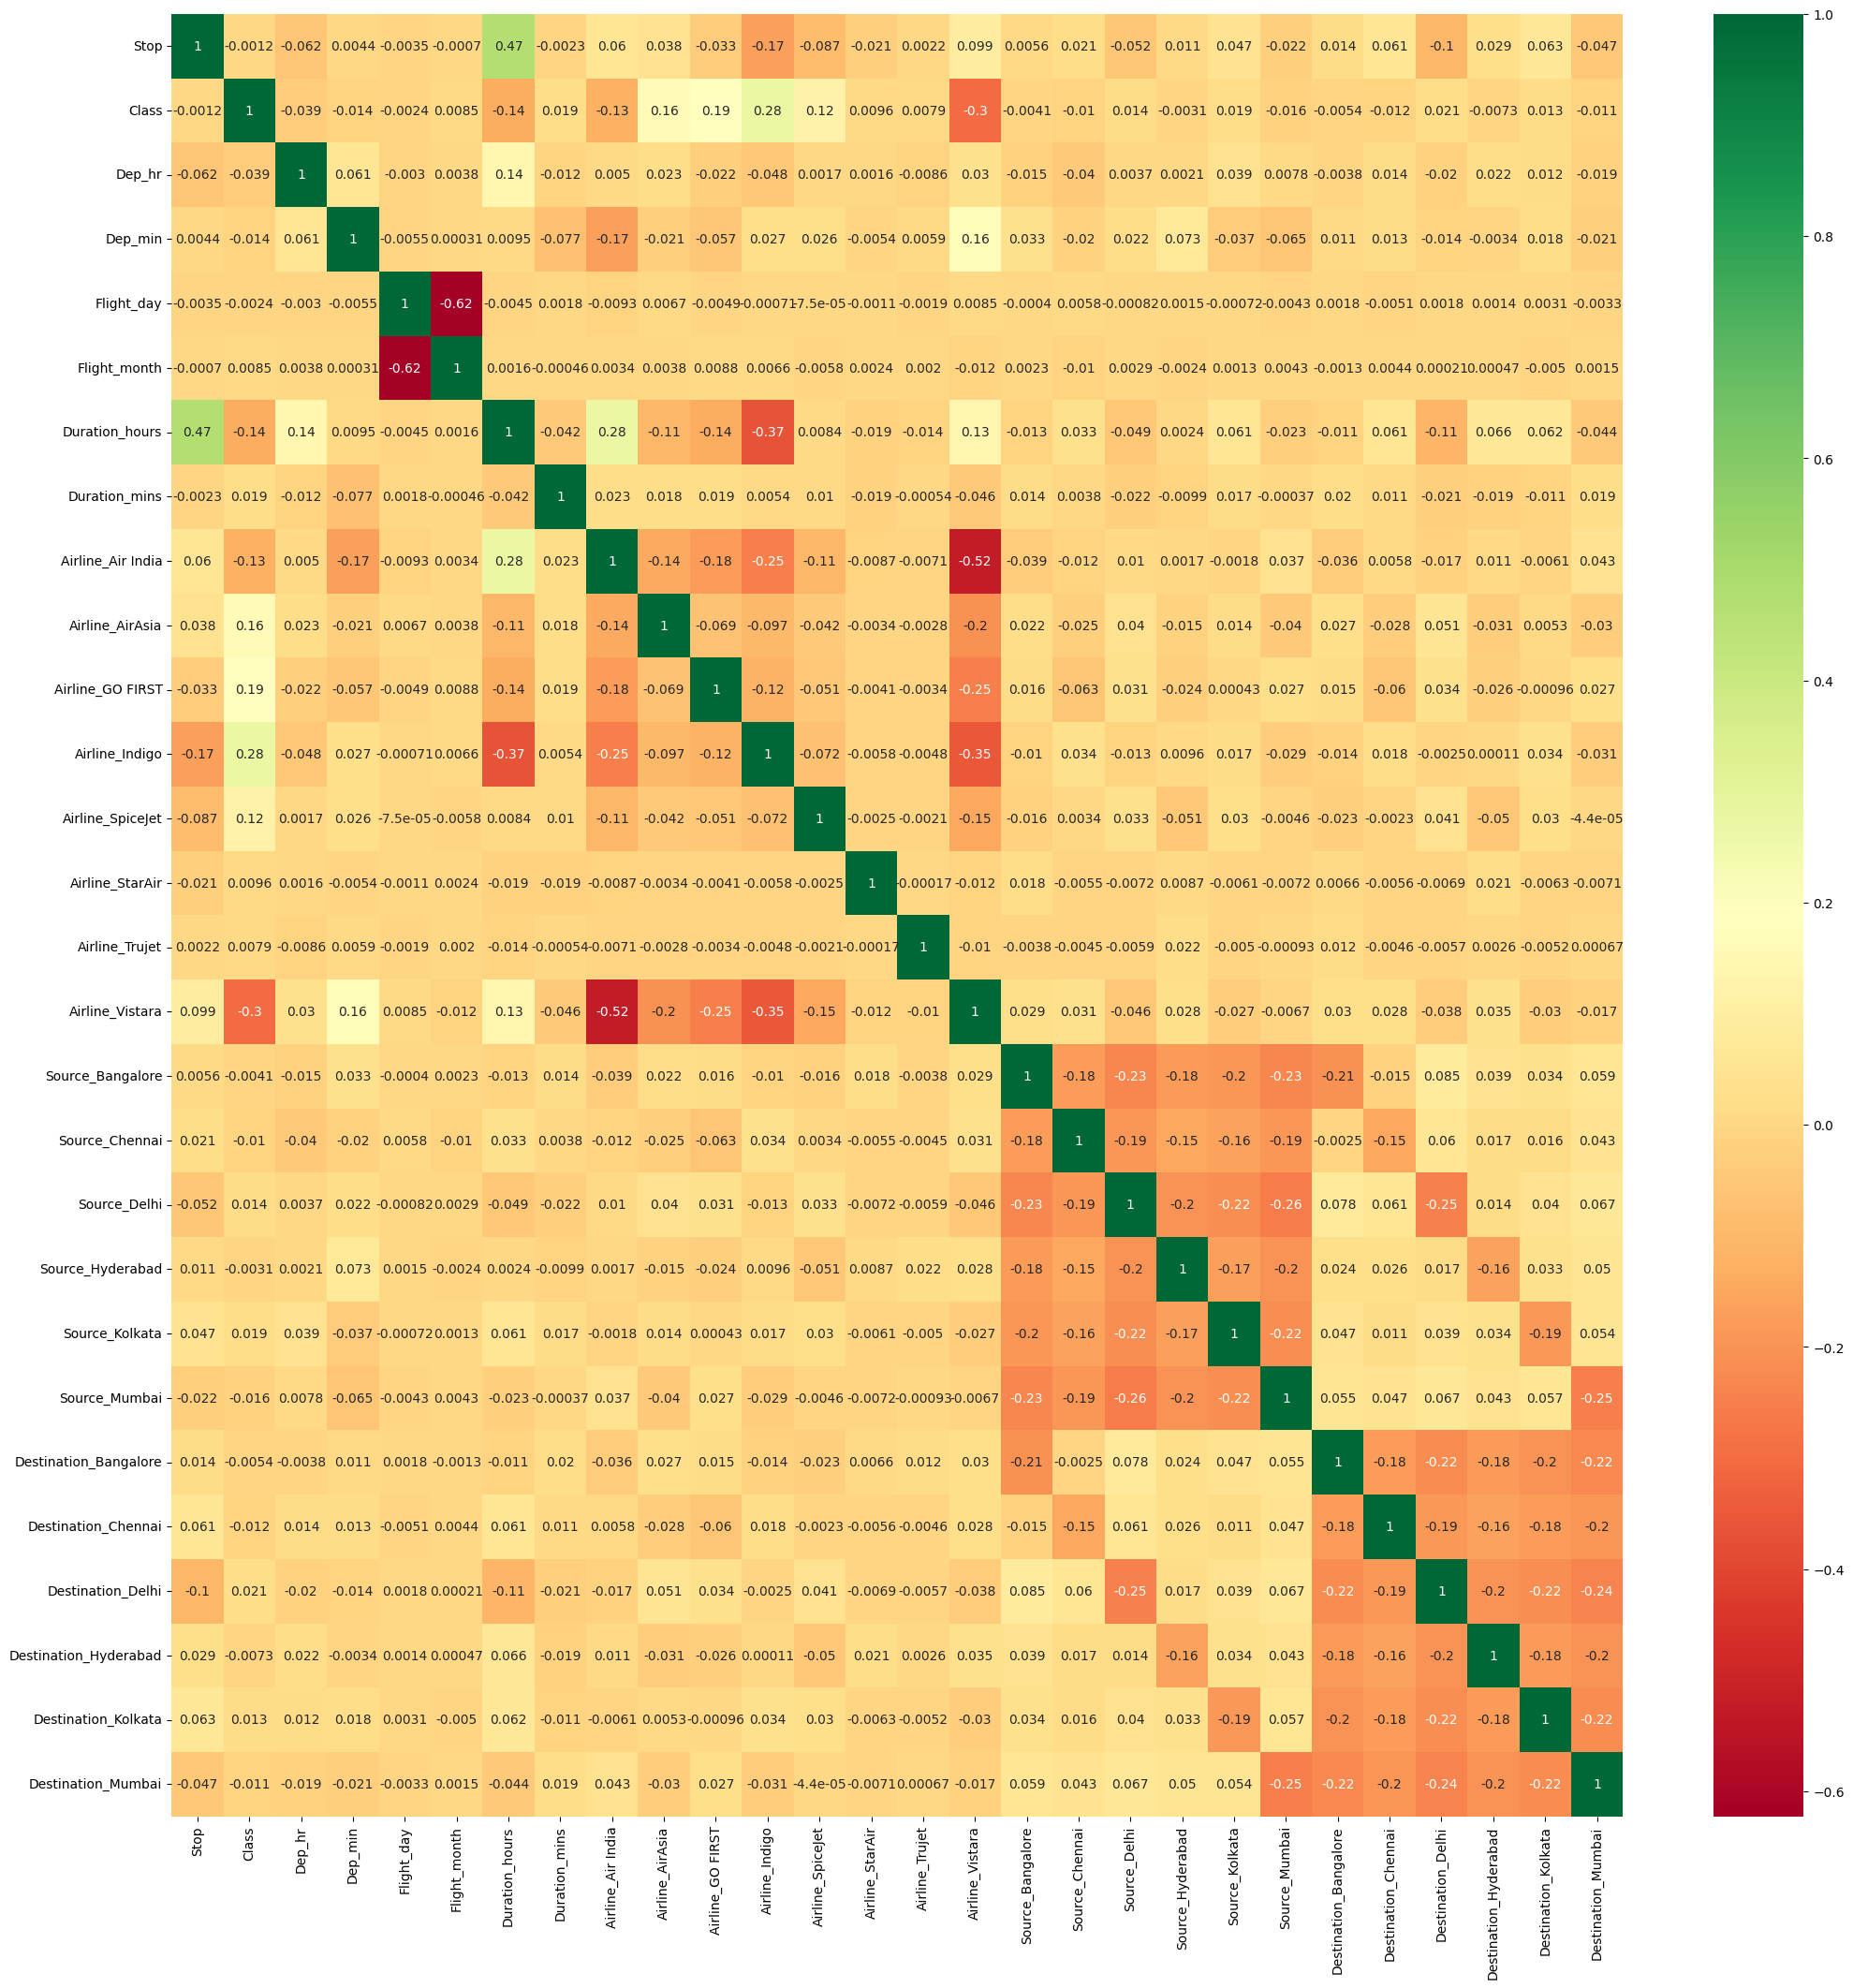

In [40]:
# Finds correlation between Independent and dependent attributes
import matplotlib.pyplot as plt
plt.figure(figsize = (25,25))
sns.heatmap(X.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [41]:

#X contains the features and y is the target variable
correlation = X.corrwith(y).sort_values(ascending=False)

print(correlation)

Airline_Vistara          0.360958
Duration_hours           0.205324
Stop                     0.119798
Airline_Air India        0.070180
Dep_hr                   0.031252
Dep_min                  0.028230
Destination_Kolkata      0.021063
Source_Chennai           0.018840
Destination_Chennai      0.018574
Source_Kolkata           0.016236
Destination_Bangalore    0.013857
Source_Mumbai            0.013291
Source_Bangalore         0.011552
Destination_Mumbai       0.010587
Flight_day              -0.003543
Destination_Hyderabad   -0.008506
Airline_Trujet          -0.009082
Airline_StarAir         -0.010018
Source_Hyderabad        -0.013124
Flight_month            -0.013426
Duration_mins           -0.025705
Source_Delhi            -0.043151
Destination_Delhi       -0.052398
Airline_SpiceJet        -0.113961
Airline_AirAsia         -0.176106
Airline_GO FIRST        -0.194101
Airline_Indigo          -0.280739
Class                   -0.937868
dtype: float64


In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=17)

In [43]:
X_train=X_train.fillna(0)

In [44]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X,y)


RandomForestRegressor()

In [45]:
y_pred=rfr.predict(X_test)

In [46]:
rfr.score(X_test,y_test)

0.9983779436436239

In [47]:
rfr.score(X_train,y_train)

0.9983024045817739

In [48]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean square error of the dat is:{mse}")
print(f"Mean absolute error is:{mae}")
print(f"Root mean square:{rmse}")
print(f"R^2 :{r2}")

Mean square error of the dat is:829162.3053976166
Mean absolute error is:342.72779209068983
Root mean square:910.5834972135266
R^2 :0.9983779436436239


In [64]:
features_list = list(X.columns)
feature_importance = pd.Series(rfr.feature_importances_, index=features_list).sort_values(ascending=False)
feature_importance = feature_importance.round(3)
print(feature_importance)

Class                    0.880
Duration_hours           0.047
Flight_day               0.012
Dep_hr                   0.009
Dep_min                  0.007
Flight_month             0.006
Duration_mins            0.005
Airline_Air India        0.005
Airline_Vistara          0.005
Source_Delhi             0.004
Destination_Delhi        0.004
Source_Mumbai            0.002
Stop                     0.002
Destination_Mumbai       0.002
Destination_Kolkata      0.002
Source_Kolkata           0.002
Destination_Bangalore    0.001
Source_Hyderabad         0.001
Destination_Hyderabad    0.001
Source_Bangalore         0.001
Source_Chennai           0.001
Destination_Chennai      0.001
Airline_AirAsia          0.000
Airline_Indigo           0.000
Airline_GO FIRST         0.000
Airline_SpiceJet         0.000
Airline_StarAir          0.000
Airline_Trujet           0.000
dtype: float64


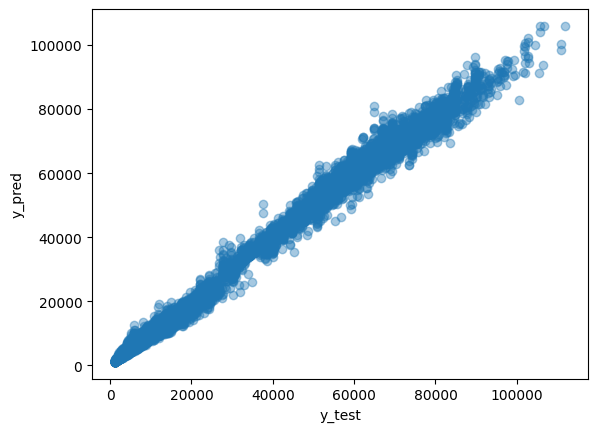

In [52]:
plt.scatter(y_test, y_pred, alpha = 0.4)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

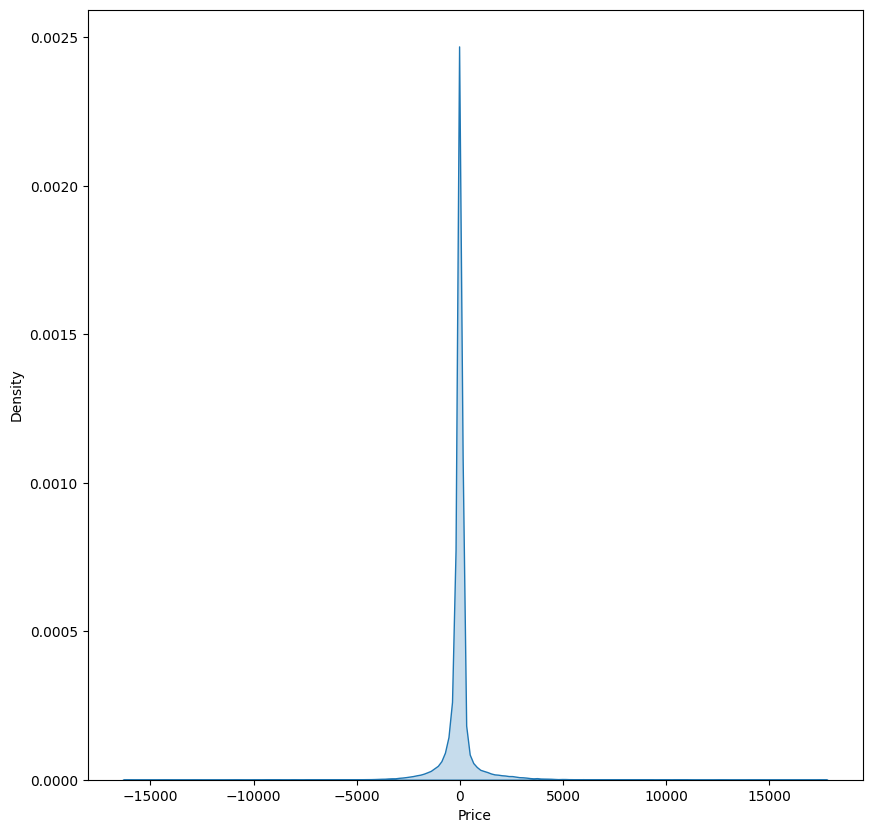

In [53]:
plt.figure(figsize = (10,10))
sns.kdeplot(y_test-y_pred, fill = True)
plt.show()

In [54]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [55]:
y_pred=lr.predict(X_test)

In [56]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Mean Absolute Error: 4780.318258814592
Mean Squared Error: 49036613.42217609
Root Mean Squared Error: 7002.614756087621
R-squared: 0.9040716757396989


In [57]:
lr.score(X_train,y_train)

0.9034636554845976

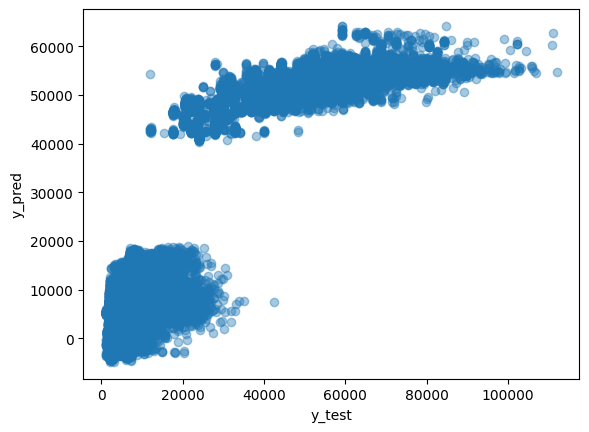

In [58]:
plt.scatter(y_test, y_pred, alpha = 0.4)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

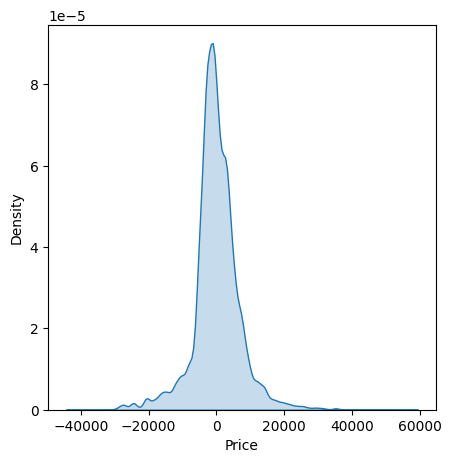

In [59]:
plt.figure(figsize = (5,5))
sns.kdeplot(y_test-y_pred, fill = True)
plt.show()

In [60]:
import xgboost as xgb
 
# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)


In [61]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Mean Absolute Error: 2233.6288198424772
Mean Squared Error: 15063784.074854083
Root Mean Squared Error: 3881.2090996046686
R-squared: 0.9705313444137573


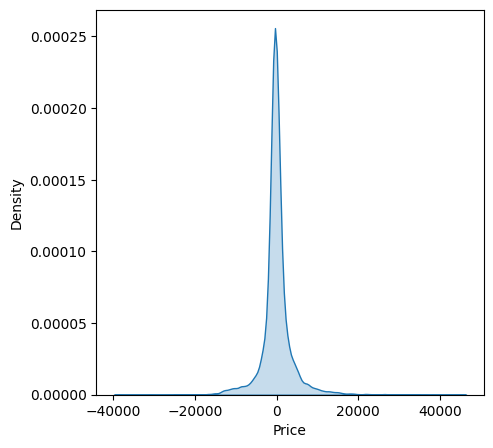

In [62]:
plt.figure(figsize = (5,5))
sns.kdeplot(y_test-y_pred, fill = True)
plt.show()

In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [70]:

# Initialize the neural network model
model = Sequential()
# 1st hidden layer
model.add(Dense(128, input_dim=28, activation='relu'))   
# 2nd hidden layer 
model.add(Dense(128, activation='relu'))

# Output layer 
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
7038/7038 [==============================] - 16s 2ms/step - loss: 203870160.0000 - mean_absolute_error: 9552.4453 - val_loss: 36881096.0000 - val_mean_absolute_error: 4066.0627
Epoch 2/50
7038/7038 [==============================] - 16s 2ms/step - loss: 35836336.0000 - mean_absolute_error: 3927.7080 - val_loss: 33985052.0000 - val_mean_absolute_error: 3833.7075
Epoch 3/50
7038/7038 [==============================] - 17s 2ms/step - loss: 34206520.0000 - mean_absolute_error: 3788.9192 - val_loss: 32589944.0000 - val_mean_absolute_error: 3720.5464
Epoch 4/50
7038/7038 [==============================] - 18s 3ms/step - loss: 32896512.0000 - mean_absolute_error: 3660.1228 - val_loss: 31467226.0000 - val_mean_absolute_error: 3566.1155
Epoch 5/50
7038/7038 [==============================] - 19s 3ms/step - loss: 31563348.0000 - mean_absolute_error: 3541.7568 - val_loss: 30689758.0000 - val_mean_absolute_error: 3498.3545
Epoch 6/50
7038/7038 [==============================] - 23s 3ms/

In [72]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               3712      
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 20353 (79.50 KB)
Trainable params: 20353 (79.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

# Calculate additional metrics (MSE, RMSE, R²)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Test MAE:", test_mae)
print("Test MSE:", mse)
print("Test RMSE:", rmse)
print("R-squared:", r2)


2346/2346 [==============================] - 3s 1ms/step
Test MAE: 2420.483642578125
Test MSE: 17314724.616171066
Test RMSE: 4161.096564148814
R-squared: 0.9661279320716858


In [78]:
# Save the model in the native Keras format
model.save('price_prediction_model.keras')
